# <center><font color = 'blue'>*ADRIS MISRA*</font></center>

**Github repository:** https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-adris-misra

# `Project -  Bank Churn Prediction`

### `Objective:`
Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### `Domain:` 
- Banking

### `Learning Outcomes:`
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using neural network classification models
- Model evaluation
- Prediction

### `Attribute Information:`
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

### Deliverable
1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [1]:
# Import warnings to suppress runtime warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import basic libraries for data and visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [88]:
# Import models and relevent class / functions

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import precision_recall_curve, auc, roc_curve


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from kerastuner.tuners import RandomSearch
from kerastuner.tuners import Hyperband
import hiplot as hip
from keras.utils.vis_utils import plot_model
from tensorflow.keras import optimizers

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
# Import other utilities

import os
import json
from pathlib import Path
import shutil
import shap

In [5]:
# Import data

cust = pd.read_csv("bank.csv")

In [6]:
# checking sample head data

cust.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [7]:
# checking sample tail data

cust.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [8]:
# shape of dataframe

cust.shape

(10000, 14)

In [9]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# Check for Missing Values
cust.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
cust.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [12]:
# Count of 0 in each column

(cust == 0).sum(axis=0)

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure              413
Balance            3617
NumOfProducts         0
HasCrCard          2945
IsActiveMember     4849
EstimatedSalary       0
Exited             7963
dtype: int64

In [13]:
# Finding all duplicate rows and adding a dup column to find count

dup_cust = cust[cust.duplicated(keep=False)]
dup_cust['dup'] = 1
dup_cust

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, dup]
Index: []

<font color='green'>**Preliminary data analysis:** 
- There are 10000 rows and 14 columns in the dataset
- There is no null or missing value in any of the columns
- There are two categorical fields that needs category conversion
- RowNumber and CustomerID are kind of identity columns so doesn't make sense for any meaningful, also surname is tied to each customer so doesn't bring much insight for prediction
- All data are not in the same scale, so scaling is required
</font>

### 2. EDA: Study the data distribution in each attribute and target variable

In [14]:
# Number of unique in each column

cust.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [15]:
# Make a copy of original dataframe and drop unwanted columns

customer_copy = cust.copy()

cust.drop(['RowNumber', 'CustomerId','Surname'], axis=1, inplace=True)

cust

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [16]:
# Separate out numerical columns vs categorical columns

num_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_col = list(set(cust.columns) - set(num_col))

print("Numerical columns: ",num_col)
print("Categorical columns:", cat_col)

Numerical columns:  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Categorical columns: ['HasCrCard', 'Exited', 'Geography', 'IsActiveMember', 'Gender']


In [17]:
# Value counts of all categorical columns

for col in cat_col:
    print('*********',col,'***********')
    df=pd.concat([cust[col].value_counts(),cust[col].value_counts(normalize=True)*100],axis=1)
    df=df.reset_index()
    df.columns=[col,'count','frequency%']
    print(df)
    print()

********* HasCrCard ***********
   HasCrCard  count  frequency%
0          1   7055       70.55
1          0   2945       29.45

********* Exited ***********
   Exited  count  frequency%
0       0   7963       79.63
1       1   2037       20.37

********* Geography ***********
  Geography  count  frequency%
0    France   5014       50.14
1   Germany   2509       25.09
2     Spain   2477       24.77

********* IsActiveMember ***********
   IsActiveMember  count  frequency%
0               1   5151       51.51
1               0   4849       48.49

********* Gender ***********
   Gender  count  frequency%
0    Male   5457       54.57
1  Female   4543       45.43



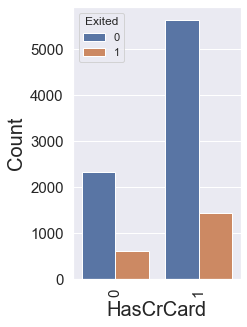

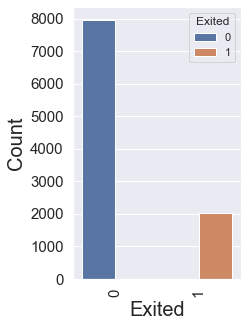

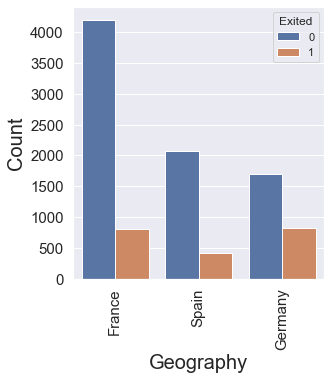

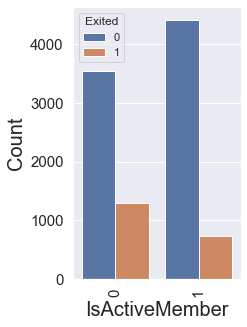

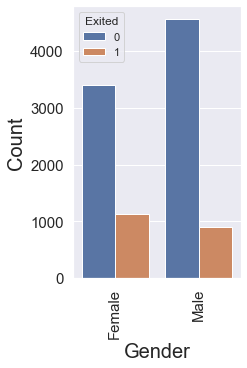

In [18]:
# categorical columns count plot

for col in cat_col:
    unq= cust[col].nunique()
    plt.figure(figsize=(unq*1.5,5));
    sns.countplot(x=cust[col], hue=cust['Exited']);
    plt.xlabel(col, size=20);
    plt.ylabel('Count', size=20);
    plt.xticks(rotation=90, size=15);
    plt.yticks(size=15);
    plt.show()

In [19]:
# Check for Skew for all variables

cust.skew().sort_values(ascending=False)

Exited             1.471611
Age                1.011320
NumOfProducts      0.745568
Tenure             0.010991
EstimatedSalary    0.002085
IsActiveMember    -0.060437
CreditScore       -0.071607
Balance           -0.141109
HasCrCard         -0.901812
dtype: float64

In [20]:
# Check for Kurt for all variables

cust.kurt().sort_values(ascending=False)

Age                1.395347
NumOfProducts      0.582981
Exited             0.165671
CreditScore       -0.425726
Tenure            -1.165225
EstimatedSalary   -1.181518
HasCrCard         -1.186973
Balance           -1.489412
IsActiveMember    -1.996747
dtype: float64

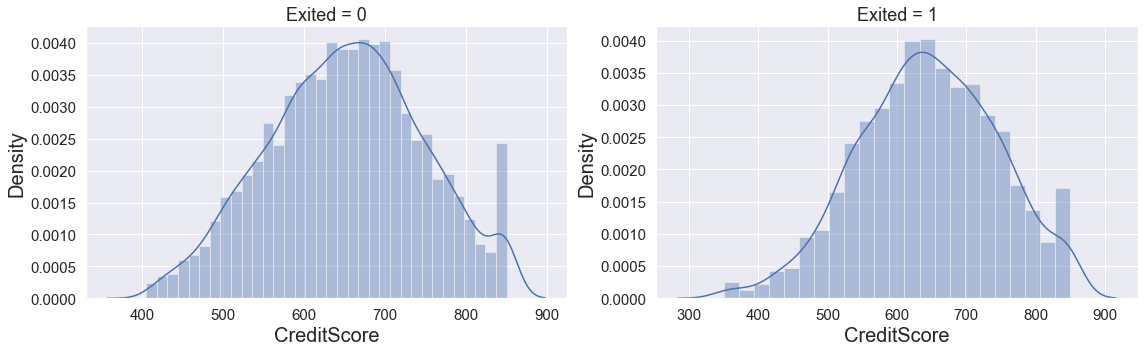

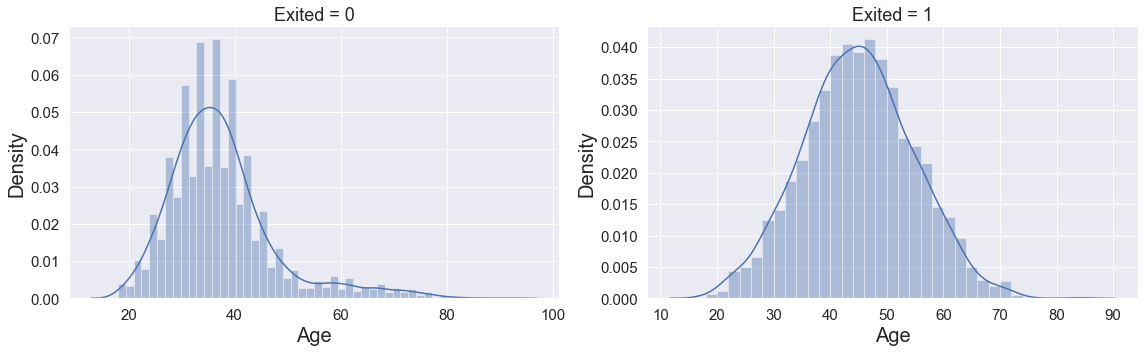

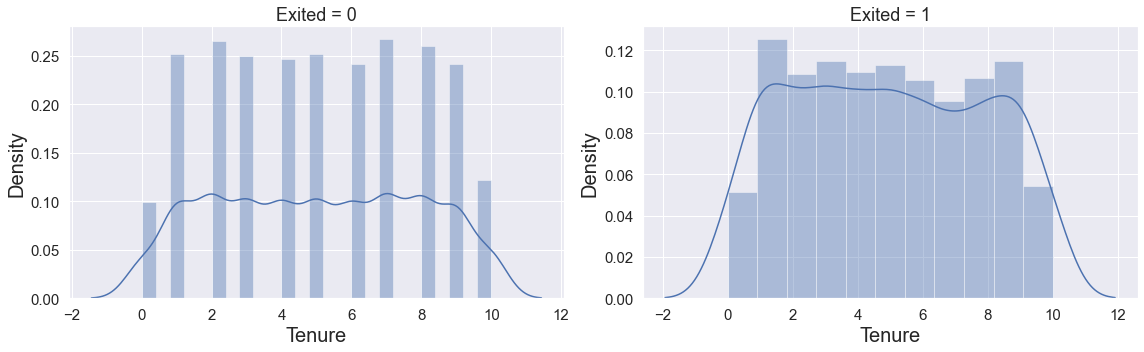

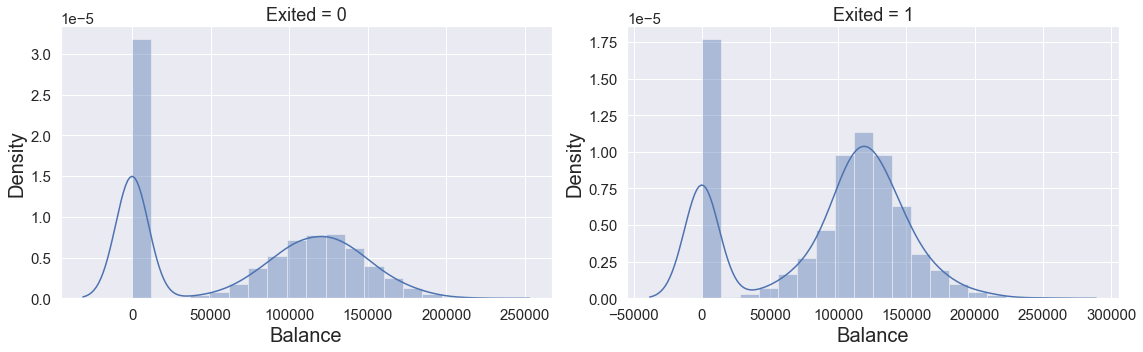

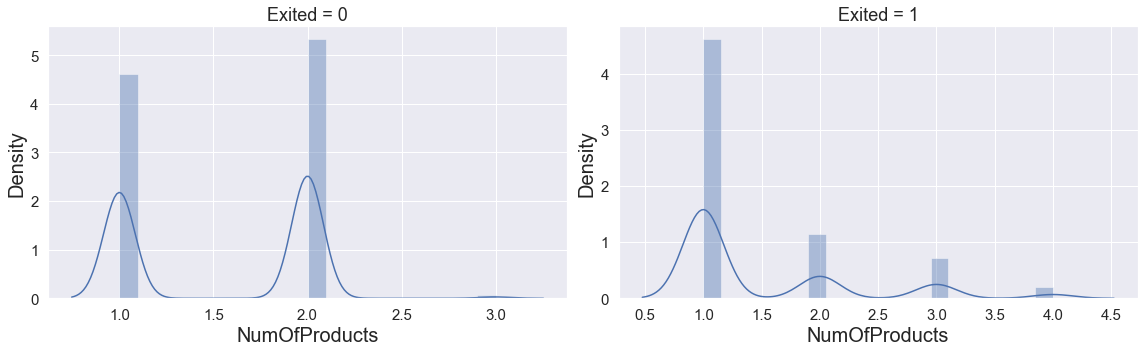

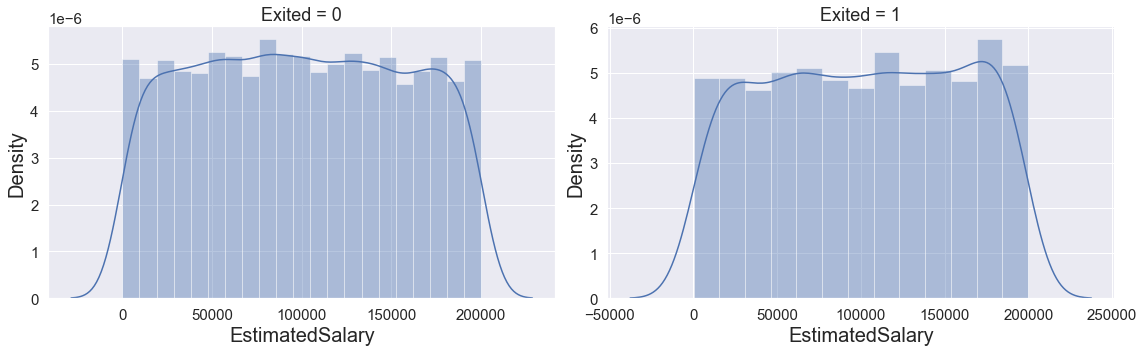

In [21]:
# continues columns plot

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
for col in num_col:
    fig, [ax1,ax2] = plt.subplots(nrows=1,ncols=2,figsize = (16,5));
    sns.distplot(x=cust[cust['Exited']==0][col], kde=True, ax=ax1);
    ax1.set_title('Exited = 0', fontsize=18);
    ax1.set_xlabel(col, size=20);
    ax1.set_ylabel('Density', size=20);
    sns.distplot(x=cust[cust['Exited']==1][col], kde=True, ax=ax2);
    ax2.set_title('Exited = 1', fontsize=18)
    ax2.set_xlabel(col, size=20);
    ax2.set_ylabel('Density', size=20);
    fig.tight_layout();
    plt.show();
plt.rcParams.update(plt.rcParamsDefault)

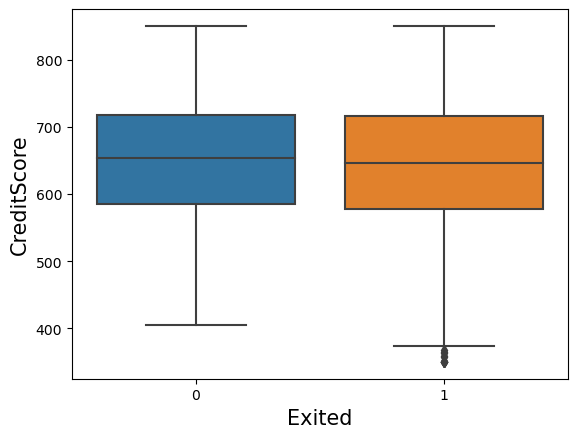

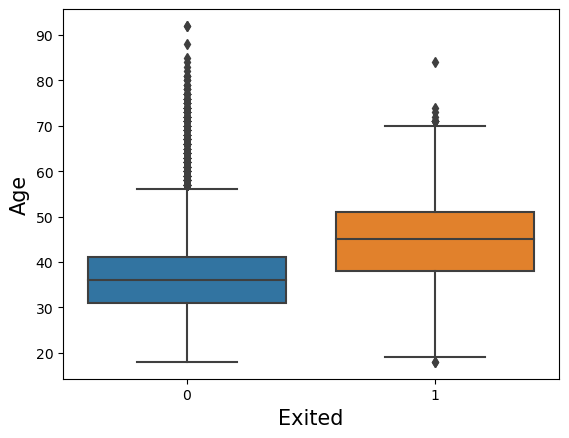

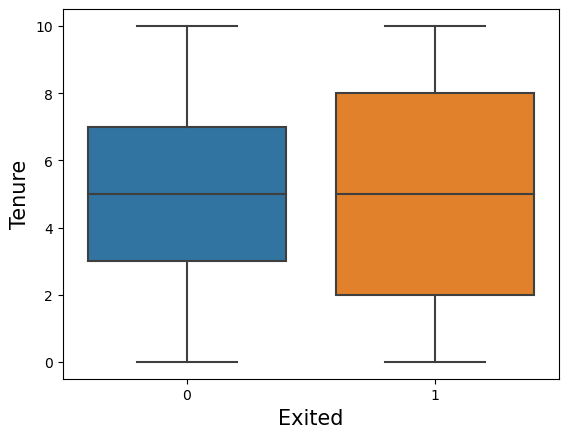

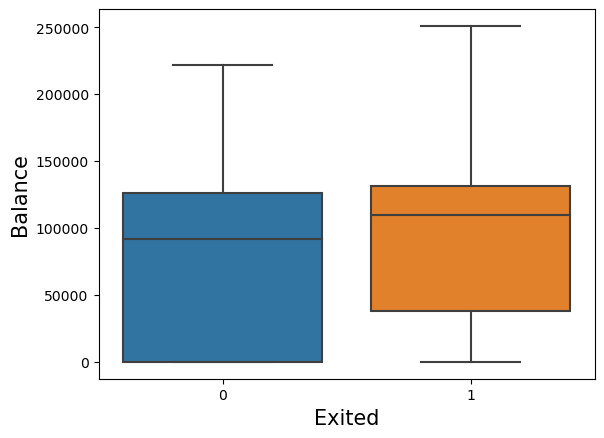

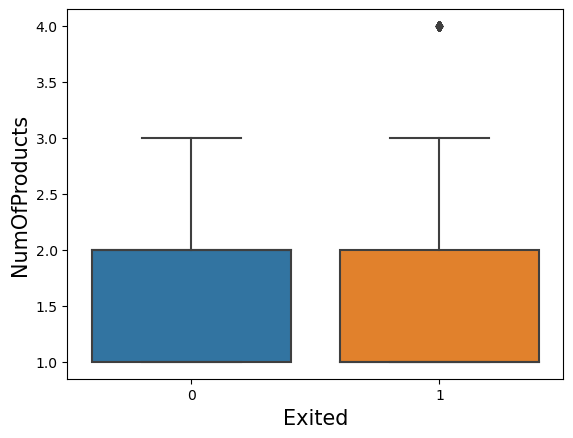

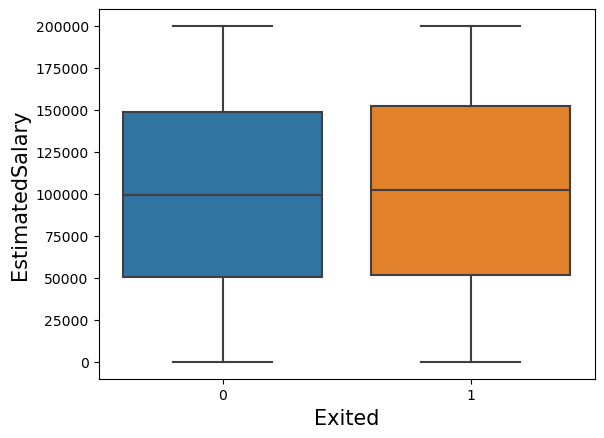

In [22]:
# Boxplot to further see outliers

for col in num_col:
    sns.boxplot(y=cust[col], x=cust['Exited'])
    plt.xlabel('Exited', size=15);
    plt.ylabel(col, size=15);
    plt.show()

<font color='green'>**Observation:**
- Exited value 1 having 20% of the values dataset is not very much imbalanced
- Age is somewhat positively skewed and have some outliers
- Estimated salary distribution is very flat
</font>

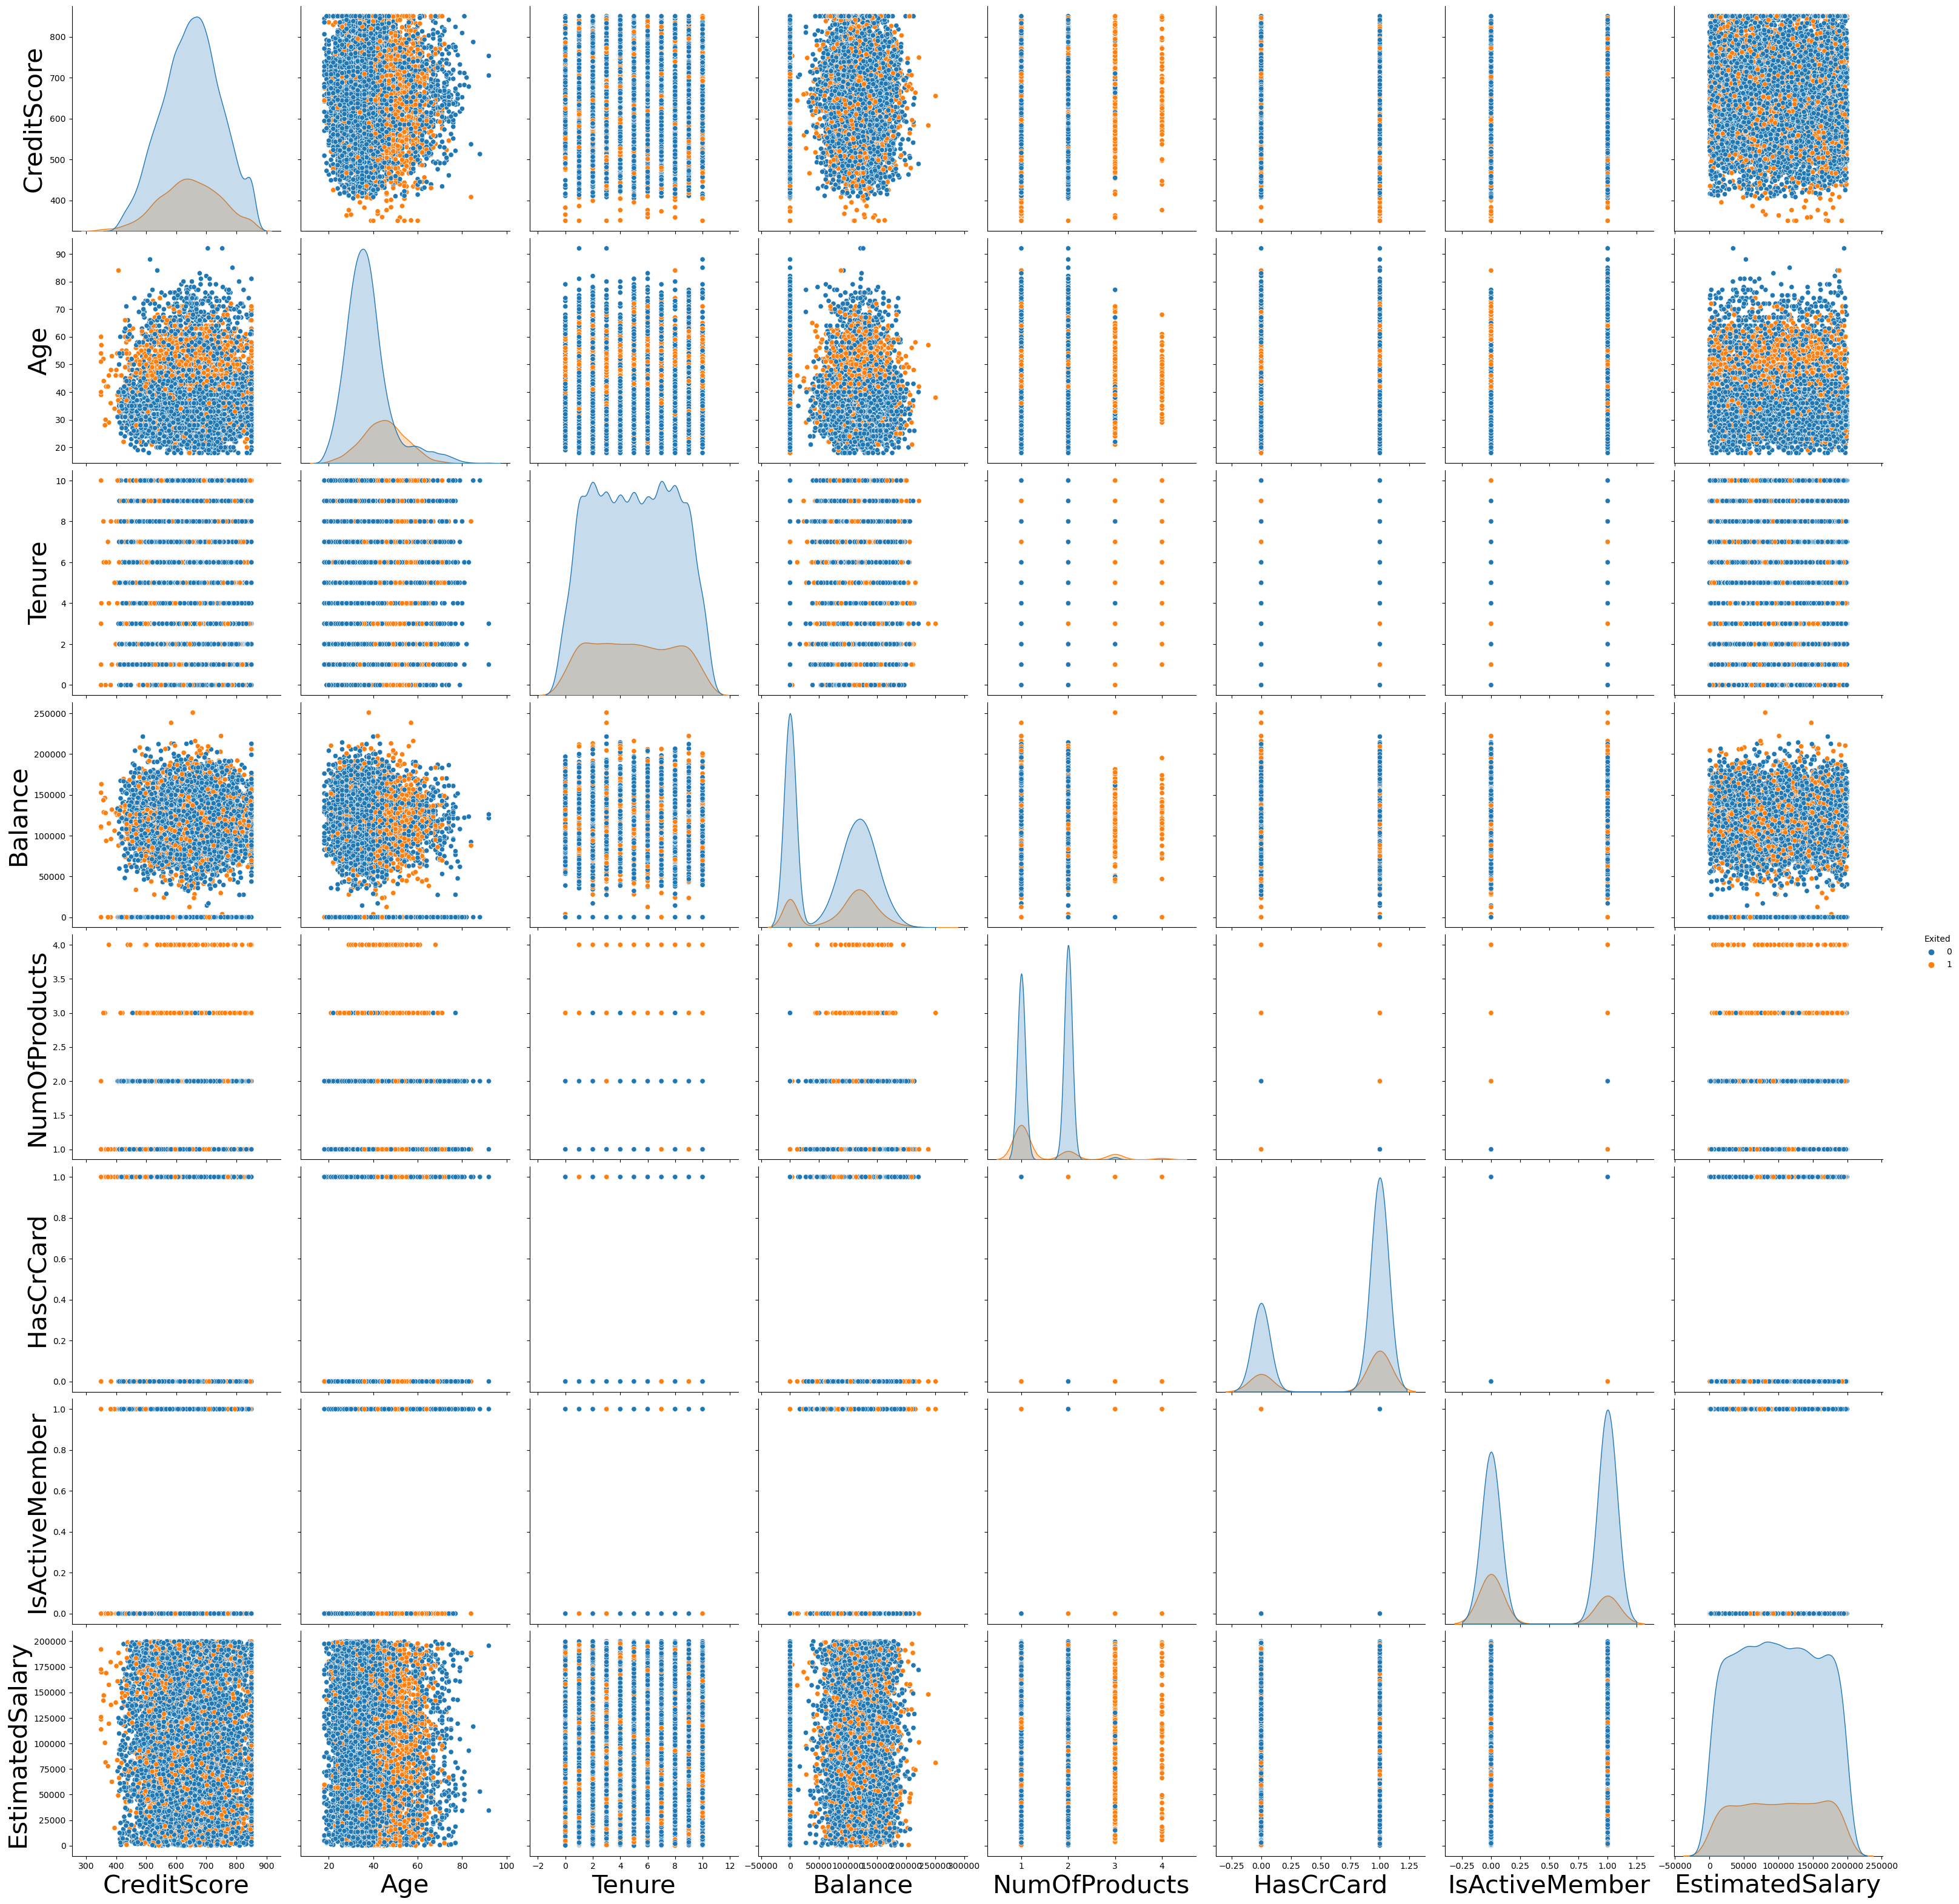

In [23]:
# pairplot With Target in Hue

sns.set_context(rc={"axes.labelsize":30})
sns.pairplot(cust, hue='Exited',diag_kind ='kde', height = 4);

plt.rcParams.update(plt.rcParamsDefault)

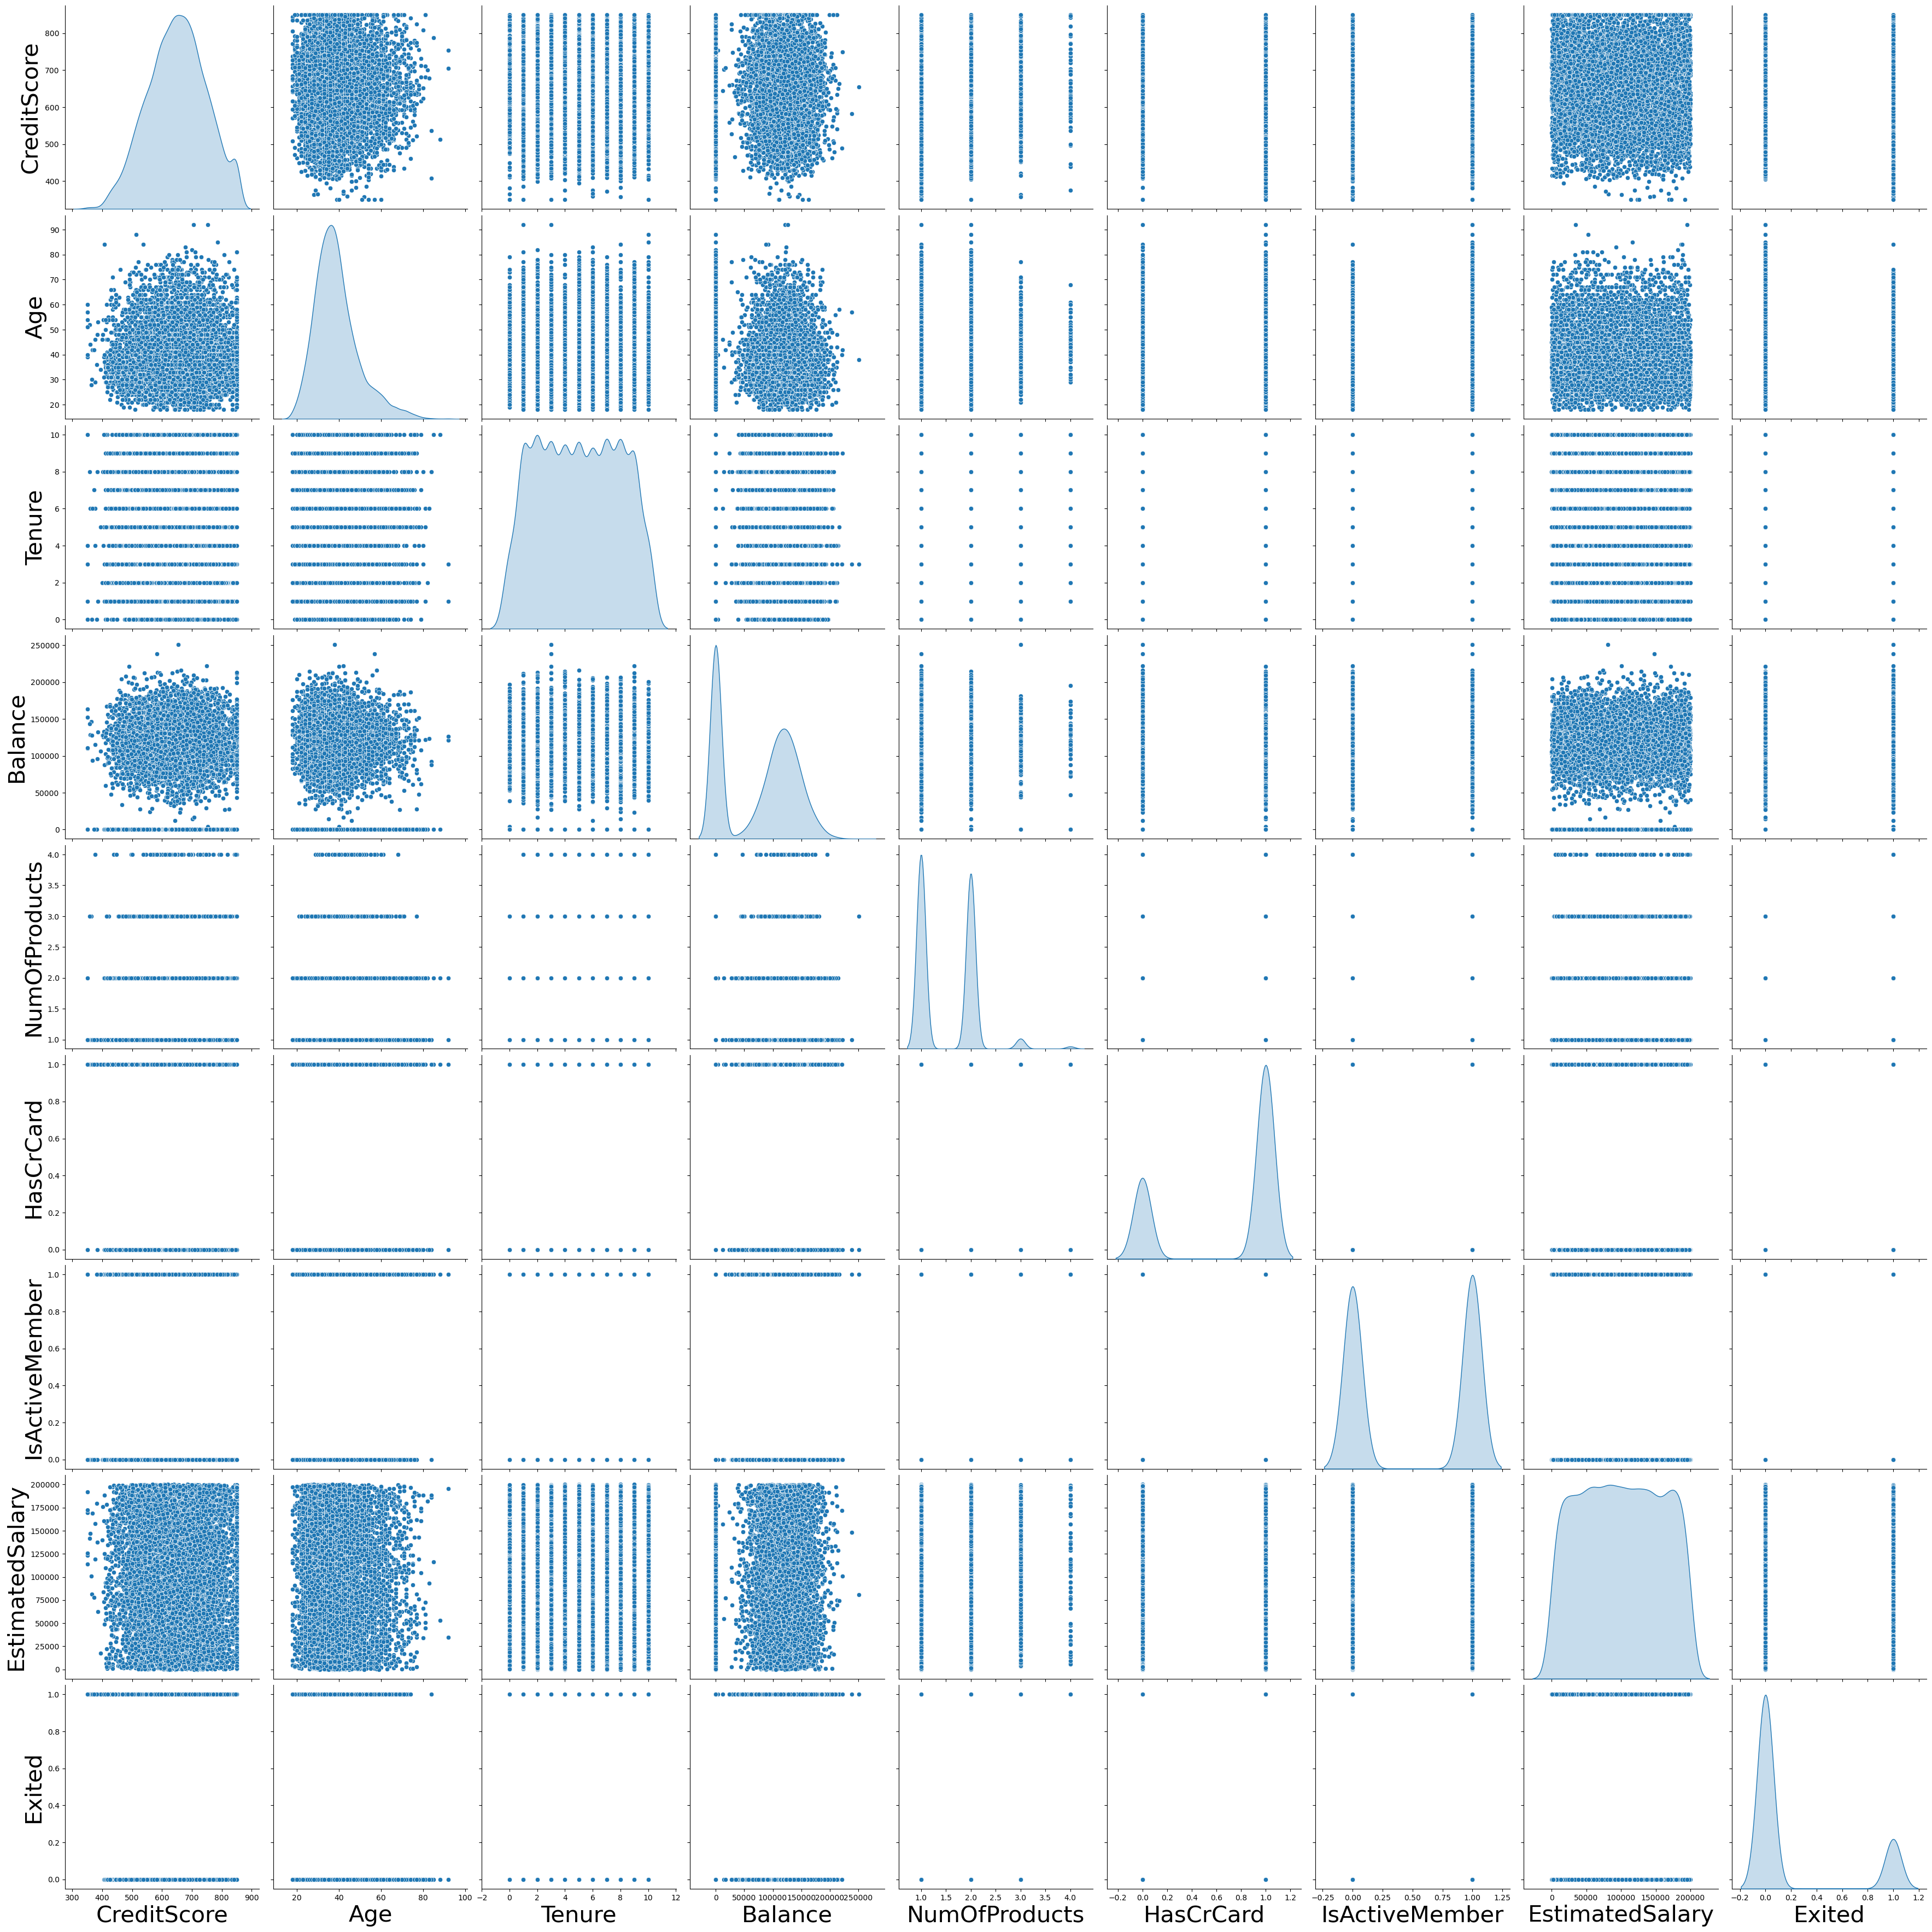

In [24]:
# pairplot including target

sns.set_context(rc={"axes.labelsize":30})
sns.pairplot(cust, diag_kind ='kde', height = 4);

plt.rcParams.update(plt.rcParamsDefault)

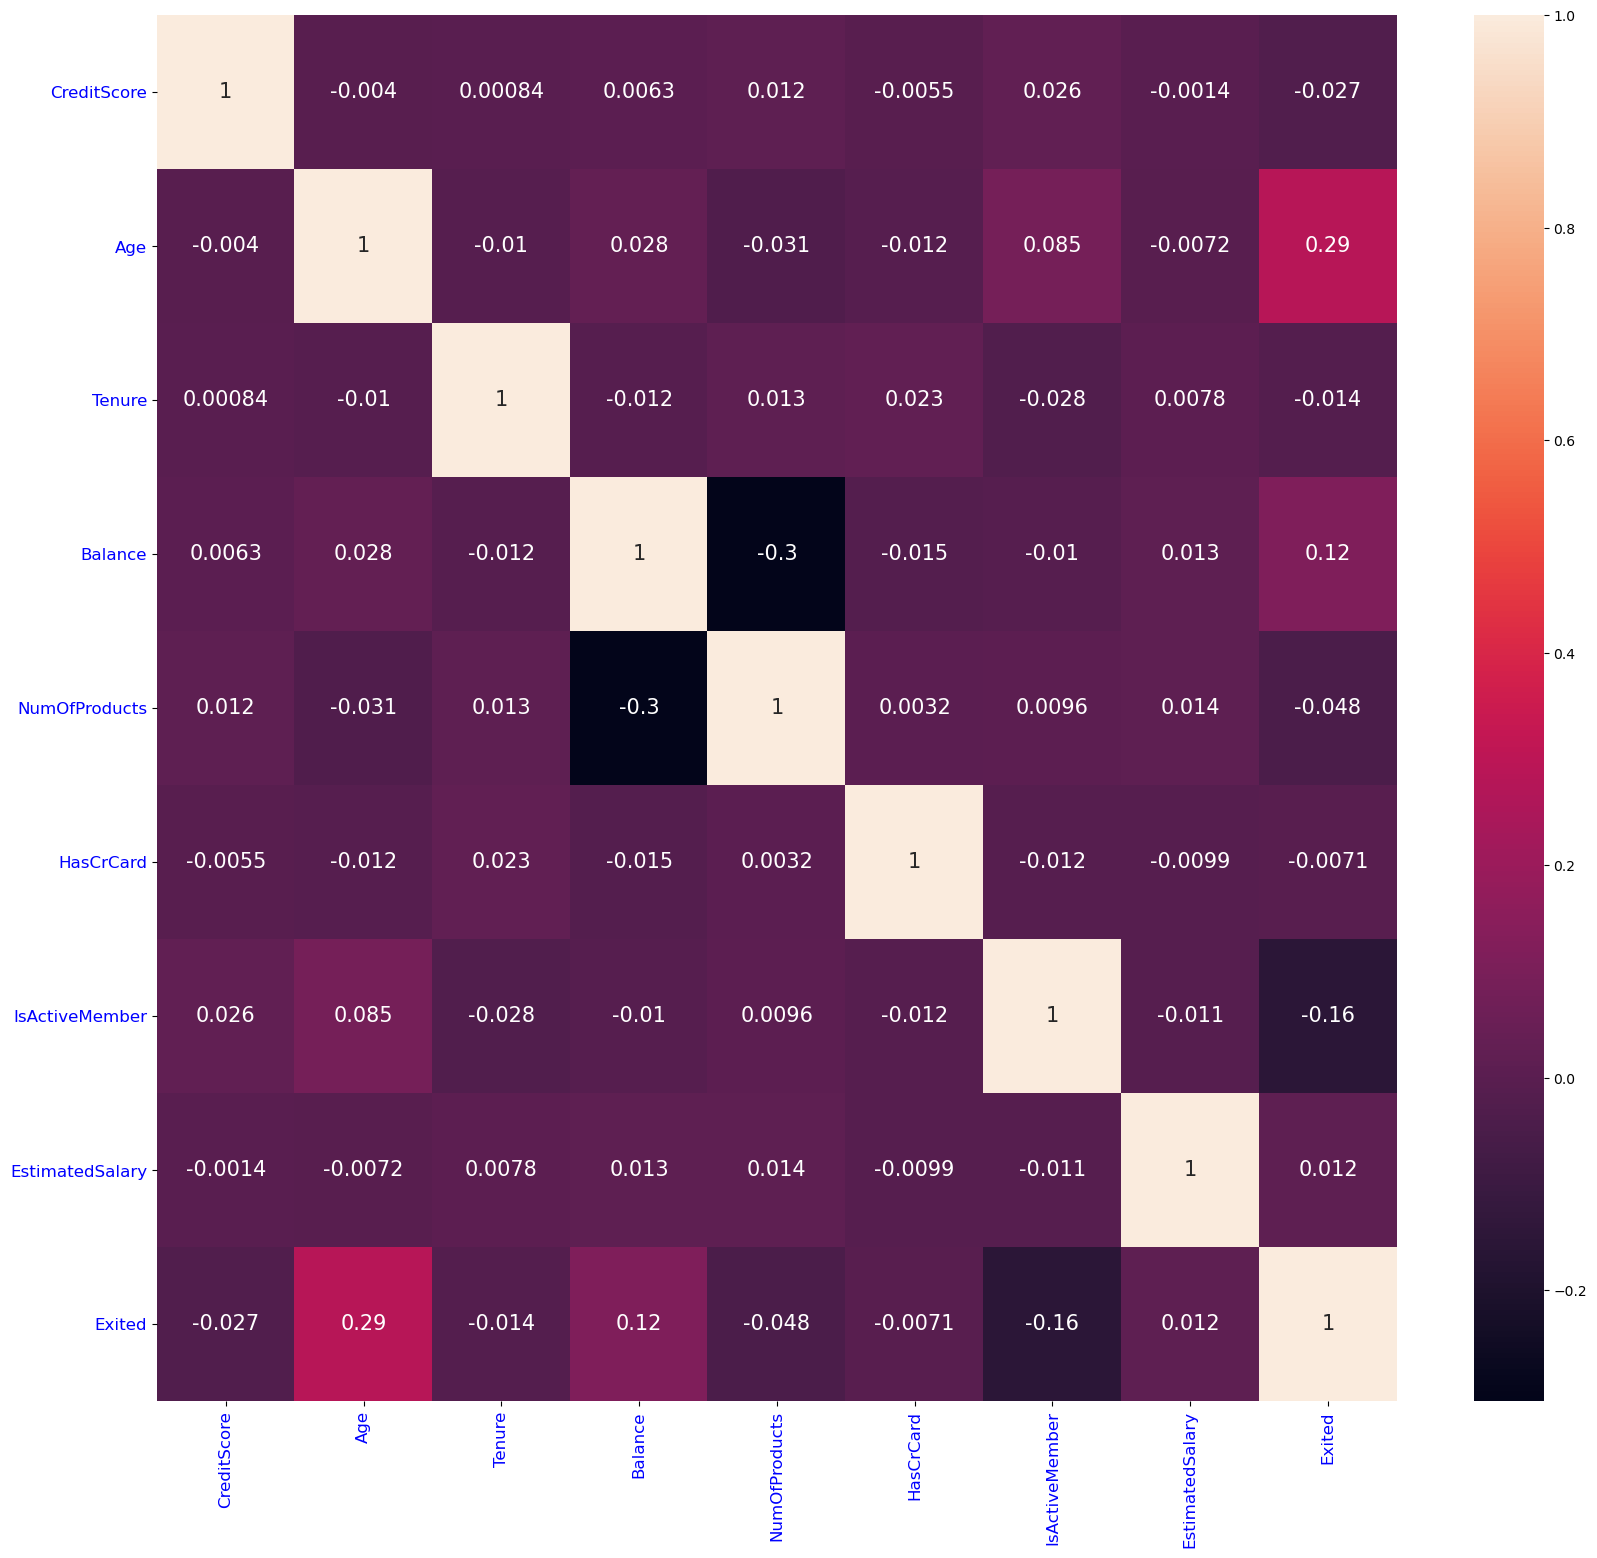

In [25]:
# correlation matrix

plt.figure(figsize=(20,18))
sns.heatmap(cust.corr(), annot=True, annot_kws={"size":15});
plt.xticks(rotation=90, size=12, color='blue');
plt.yticks(rotation=0, size=12, color='blue');

<font color='green'>**Observation:**
- There doesn't seem to have much correlation between numerical data
- There is not much correlation between the target variable and independent variables as well
</font>

### 3. Data preparation

In [26]:
# Convert the columns with an 'object' datatype into categorical variables

for col in cust.columns: # Loop through all columns in the dataframe
    if cust[col].dtype == 'object': # Only apply for columns with categorical strings
        cust[col] = pd.Categorical(cust[col])# Replace strings with an integer

In [27]:
# checking sample head data

cust.head(10)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   
5          645     Spain    Male   44       8  113755.78              2   
6          822    France    Male   50       7       0.00              2   
7          376   Germany  Female   29       4  115046.74              4   
8          501    France    Male   44       4  142051.07              2   
9          684    France    Male   27       2  134603.88              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
5          1               0        149756.71       1  
6          1               1         10062.80       0  
7          1               0        119346.88       1  
8          0               1         74940.50       0  
9          1               1         71725.73       0

In [28]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [29]:
# Defining independent and dependent variable

X = cust.drop(['Exited'],axis=1)
y = cust['Exited']

In [30]:
# convert categorical variables to dummy variables

X = pd.get_dummies(X)

In [31]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [32]:
X

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                  1        101348.88                 1                  0   
1                  1        112542.58                 0                  0   
2                  0        113931.57                 1                  0   
3                  0         93826.63                 1                  0   
4                  1         79084.10                 0                  0   
...              ...              ...               ...                ...   
9995               0         96270.64                 1                  0   
9996               1        101699.77                 1                  0   
9997               1         42085.58                 1                  0   
9998               0         92888.52                 0                  1   
9999               0         38190.78                 1                  0   

      Geography_Spain  Gender_Female  Gender_Male  
0                   0              1            0  
1                   1              1            0  
2                   0              1            0  
3                   0              1            0  
4                   1              1            0  
...               ...            ...          ...  
9995                0              0            1  
9996                0              0            1  
9997                0              1            0  
9998                0              0            1  
9999                0              1            0  

[10000 rows x 13 columns]

In [33]:
# Split the data into training, validation and test set in the ratio of 60:15:25 respectively

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=5)

X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.2, random_state=5)

In [34]:
# checking if distribution between train and test are similar to the original sample

print('y:\n', y.value_counts(normalize=True)*100)
print('\n\ny_train:\n', y_train.value_counts(normalize=True)*100)
print('\n\ny_val:\n', y_val.value_counts(normalize=True)*100)
print('\n\ny_test:\n', y_test.value_counts(normalize=True)*100)

y:
 0    79.63
1    20.37
Name: Exited, dtype: float64


y_train:
 0    79.4
1    20.6
Name: Exited, dtype: float64


y_val:
 0    80.0
1    20.0
Name: Exited, dtype: float64


y_test:
 0    79.96
1    20.04
Name: Exited, dtype: float64


In [35]:
# Scaling data

scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_val = scale.fit_transform(X_val)
X_test = scale.fit_transform(X_test)

In [36]:
X_train.shape

(6000, 13)

In [37]:
X_train

array([[-0.49194358,  0.00878354, -0.01039474, ...,  1.76981112,
         1.11076771, -1.11076771],
       [ 0.63858766,  0.39206541, -1.39635974, ..., -0.56503205,
        -0.90027824,  0.90027824],
       [ 1.28164213,  2.02101336, -0.01039474, ..., -0.56503205,
        -0.90027824,  0.90027824],
       ...,
       [-0.32599404, -0.7577802 , -1.04986849, ..., -0.56503205,
         1.11076771, -1.11076771],
       [ 1.62391306, -1.0452416 ,  0.68258776, ...,  1.76981112,
         1.11076771, -1.11076771],
       [ 1.08457705, -0.08703692, -1.39635974, ..., -0.56503205,
         1.11076771, -1.11076771]])

In [38]:
X_val.shape

(1500, 13)

In [39]:
X_val

array([[-1.44704782,  1.85917911, -0.66564414, ..., -0.60405063,
         1.07767494, -1.07767494],
       [-0.49343642,  0.9272909 ,  0.7401513 , ..., -0.60405063,
        -0.92792359,  0.92792359],
       [ 0.72393985, -0.75010788, -0.31419528, ...,  1.65549037,
        -0.92792359,  0.92792359],
       ...,
       [ 0.87611188, -0.56373024, -0.31419528, ..., -0.60405063,
         1.07767494, -1.07767494],
       [ 1.92102651, -0.00459732,  0.03725358, ...,  1.65549037,
         1.07767494, -1.07767494],
       [ 0.9369807 , -0.3773526 ,  0.38870244, ...,  1.65549037,
        -0.92792359,  0.92792359]])

In [40]:
X_test.shape

(2500, 13)

In [41]:
X_test

array([[ 1.21956451, -0.08389144,  0.32646004, ...,  1.7339003 ,
        -0.93266172,  0.93266172],
       [-1.22785449, -0.466259  ,  0.66751733, ..., -0.57673443,
         1.07220011, -1.07220011],
       [ 0.80298255, -0.466259  ,  1.34963192, ..., -0.57673443,
         1.07220011, -1.07220011],
       ...,
       [-1.29034178, -0.65744278, -1.71988372, ...,  1.7339003 ,
         1.07220011, -1.07220011],
       [ 0.31349875, -0.37066711, -1.03776913, ..., -0.57673443,
         1.07220011, -1.07220011],
       [ 1.00085898,  0.10729234, -1.71988372, ..., -0.57673443,
        -0.93266172,  0.93266172]])

In [42]:
# Converting Y variable to aarrays

y_train= y_train.values
y_val= y_val.values
y_test = y_test.values

In [43]:
y_train

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [44]:
y_train.shape

(6000,)

In [45]:
y_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
y_val.shape

(1500,)

In [47]:
y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [48]:
y_test.shape

(2500,)

### 4. Model Building

In [49]:
# Initializing blank sequential model

model = Sequential()

In [50]:
# Adding 1st hidden layer and output layer
# Choosing 24 neuron in 1st layer with activation function relu
# as this is binary classification there is one output layer

model.add(Dense(24, input_shape = (13,), activation = 'relu', kernel_initializer='normal', bias_initializer='zeros'))
model.add(Dense(1, activation = 'sigmoid'))

In [51]:
# Optimizer and Loss function

opt = optimizers.Adam(lr = 0.001)
lss = 'binary_crossentropy'

In [52]:
# Model compile

model.compile(optimizer = opt, loss = lss, metrics=['accuracy'])

In [53]:
# Model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 5. Training [Forward pass and Backpropagation]

In [54]:
# running model on 50 Epocs and each bach size of 1000 records

history = model.fit(X_train, y_train, batch_size=1000, epochs = 200, verbose = 1,validation_data=(X_val, y_val))


Epoch 1/200
6/6 [==============================] - 3s 343ms/step - loss: 0.6846 - accuracy: 0.5730 - val_loss: 0.6678 - val_accuracy: 0.6273
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 0.6618 - accuracy: 0.6539 - val_loss: 0.6459 - val_accuracy: 0.6993
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 0.6401 - accuracy: 0.7096 - val_loss: 0.6254 - val_accuracy: 0.7360
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 0.6197 - accuracy: 0.7526 - val_loss: 0.6064 - val_accuracy: 0.7653
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 0.6005 - accuracy: 0.7775 - val_loss: 0.5888 - val_accuracy: 0.7820
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 0.5814 - accuracy: 0.7981 - val_loss: 0.5726 - val_accuracy: 0.7900
Epoch 7/200
6/6 [==============================] - 0s 10ms/step - loss: 0.5691 - accuracy: 0.8002 - val_loss: 0.5577 - val_accuracy: 0.7947
Epoch 8/200
6/6 [==

6/6 [==============================] - 0s 9ms/step - loss: 0.3839 - accuracy: 0.8328 - val_loss: 0.3836 - val_accuracy: 0.8353
Epoch 60/200
6/6 [==============================] - 0s 9ms/step - loss: 0.3940 - accuracy: 0.8276 - val_loss: 0.3821 - val_accuracy: 0.8380
Epoch 61/200
6/6 [==============================] - 0s 9ms/step - loss: 0.3838 - accuracy: 0.8351 - val_loss: 0.3808 - val_accuracy: 0.8387
Epoch 62/200
6/6 [==============================] - 0s 9ms/step - loss: 0.3913 - accuracy: 0.8309 - val_loss: 0.3794 - val_accuracy: 0.8420
Epoch 63/200
6/6 [==============================] - 0s 9ms/step - loss: 0.3792 - accuracy: 0.8382 - val_loss: 0.3782 - val_accuracy: 0.8420
Epoch 64/200
6/6 [==============================] - 0s 9ms/step - loss: 0.3836 - accuracy: 0.8346 - val_loss: 0.3768 - val_accuracy: 0.8440
Epoch 65/200
6/6 [==============================] - 0s 11ms/step - loss: 0.3838 - accuracy: 0.8331 - val_loss: 0.3754 - val_accuracy: 0.8427
Epoch 66/200
6/6 [==============

6/6 [==============================] - 0s 10ms/step - loss: 0.3486 - accuracy: 0.8567 - val_loss: 0.3405 - val_accuracy: 0.8620
Epoch 118/200
6/6 [==============================] - 0s 9ms/step - loss: 0.3515 - accuracy: 0.8555 - val_loss: 0.3402 - val_accuracy: 0.8627
Epoch 119/200
6/6 [==============================] - 0s 10ms/step - loss: 0.3506 - accuracy: 0.8547 - val_loss: 0.3399 - val_accuracy: 0.8633
Epoch 120/200
6/6 [==============================] - 0s 10ms/step - loss: 0.3506 - accuracy: 0.8543 - val_loss: 0.3396 - val_accuracy: 0.8627
Epoch 121/200
6/6 [==============================] - 0s 10ms/step - loss: 0.3508 - accuracy: 0.8548 - val_loss: 0.3393 - val_accuracy: 0.8627
Epoch 122/200
6/6 [==============================] - 0s 10ms/step - loss: 0.3501 - accuracy: 0.8538 - val_loss: 0.3390 - val_accuracy: 0.8627
Epoch 123/200
6/6 [==============================] - 0s 11ms/step - loss: 0.3551 - accuracy: 0.8491 - val_loss: 0.3388 - val_accuracy: 0.8620
Epoch 124/200
6/6 [==

Epoch 175/200
6/6 [==============================] - 0s 10ms/step - loss: 0.3409 - accuracy: 0.8581 - val_loss: 0.3317 - val_accuracy: 0.8660
Epoch 176/200
6/6 [==============================] - 0s 10ms/step - loss: 0.3385 - accuracy: 0.8575 - val_loss: 0.3315 - val_accuracy: 0.8660
Epoch 177/200
6/6 [==============================] - 0s 10ms/step - loss: 0.3422 - accuracy: 0.8591 - val_loss: 0.3315 - val_accuracy: 0.8667
Epoch 178/200
6/6 [==============================] - 0s 11ms/step - loss: 0.3297 - accuracy: 0.8670 - val_loss: 0.3315 - val_accuracy: 0.8660
Epoch 179/200
6/6 [==============================] - 0s 13ms/step - loss: 0.3348 - accuracy: 0.8603 - val_loss: 0.3315 - val_accuracy: 0.8653
Epoch 180/200
6/6 [==============================] - 0s 10ms/step - loss: 0.3378 - accuracy: 0.8593 - val_loss: 0.3315 - val_accuracy: 0.8667
Epoch 181/200
6/6 [==============================] - 0s 10ms/step - loss: 0.3353 - accuracy: 0.8644 - val_loss: 0.3312 - val_accuracy: 0.8680
Epoch 

In [55]:
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

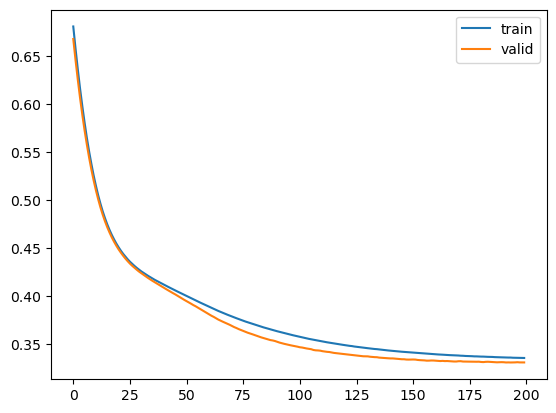

In [56]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

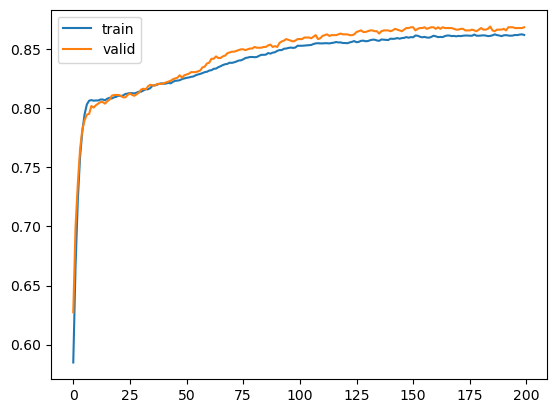

In [57]:
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

<font color='green'>**Observation:** </font>
- Basic model gives about .87 validation accuracy and .33 validation loss
- Next we will tune hyper paramers to see if further improvements possible

In [58]:
# comparing with Logistic Regression

logreg = LogisticRegression(n_jobs=-1)

logreg.fit(X_train,y_train)

print("Training Score: ",logreg.score(X_train, y_train))
print("Validation Score: ",logreg.score(X_val, y_val))
print("Test Score: ",logreg.score(X_test, y_test))

Training Score:  0.81
Validation Score:  0.8146666666666667
Test Score:  0.8144


In [59]:
# comparing with Random forest

rfc = RandomForestClassifier(max_depth=10, n_jobs=None, random_state=5)

rfc.fit(X_train,y_train)

print("Training Score: ",rfc.score(X_train, y_train))
print("Validation Score: ",rfc.score(X_val, y_val))
print("Test Score: ",rfc.score(X_test, y_test))

Training Score:  0.9083333333333333
Validation Score:  0.8766666666666667
Test Score:  0.8616


In [90]:
# comparing with gradient boosting

gbc = GradientBoostingClassifier(n_estimators = 250, learning_rate=0.01, random_state=5)
gbc = gbc.fit(X_train, y_train)

print("Training Score: ",gbc.score(X_train, y_train))
print("Validation Score: ",gbc.score(X_val, y_val))
print("Test Score: ",gbc.score(X_test, y_test))

Training Score:  0.8601666666666666
Validation Score:  0.8773333333333333
Test Score:  0.8572


<font color='green'>**Observation:** </font>
- Without any tuning Random forest is giving a score close to neural network, considering that in real envirnment it might be solved by regular machine learning
- Where as here for the academic purpose we will proceed with the neural network, tune it and see if we can improve the performance further

### 6. HyperParameter Tuning

In [60]:
# Build hypermodel

def build_model(hp):
    model_1 = Sequential() #Start model
    model_1.add(Dense(units=hp.Int('units_in',min_value=10,max_value=100,step=10),  
                    input_shape = (13,), 
                    activation = hp.Choice('act_in', ['relu', 'tanh','elu']))) # Hidden Layer connected to Input Layer
    for i in range(hp.Int('num_layers', 0, 2)):
      model_1.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=10,
                                            max_value=100,
                                            step=10),
                               activation=hp.Choice('act_' + str(i), ['relu', 'tanh','elu'])))  # Hidden Layer
      model_1.add(Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.3))) # Drop out layer for regularization

    model_1.add(Dense(1, activation='sigmoid')) # Output layer
      
    model_1.compile(
         optimizer=optimizers.Adam(
             hp.Choice('learning_rate', [0.01, 0.005, 0.001, 0.0005, 0.0001])),
             loss='binary_crossentropy',
             metrics=['accuracy'])
      
    return model_1

#### <font color='sky blue'>   Random Search  </font>

In [61]:
# removing the path if existis

dirpath = Path('C:/AI-ML/UTA/BankChurn', 'Random_Search')
if dirpath.exists() and dirpath.is_dir():
    shutil.rmtree(dirpath)

In [62]:
# define tuner for random search

tunerRS = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    seed=5,
    directory='C:/AI-ML/UTA/BankChurn',
    project_name='Random_Search')

In [63]:
# serch parameter space

tunerRS.search_space_summary()

Search space summary
Default search space size: 4
units_in (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 10, 'sampling': None}
act_in (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'elu'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 2, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.005, 0.001, 0.0005, 0.0001], 'ordered': True}


In [64]:
# Serching best parameter run

tunerRS.search(X_train, y_train , batch_size=1000, epochs = 200,validation_data =(X_val,y_val))

Trial 5 Complete [00h 00m 26s]
val_accuracy: 0.8146666586399078

Best val_accuracy So Far: 0.8819999992847443
Total elapsed time: 00h 02m 17s
INFO:tensorflow:Oracle triggered exit


In [65]:
#Summary of best results

print(tunerRS.results_summary())

Results summary
Results in C:/AI-ML/UTA/BankChurn\Random_Search
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_in: 90
act_in: elu
num_layers: 1
learning_rate: 0.005
units_0: 70
act_0: relu
dropout: 0.30000000000000004
Score: 0.8819999992847443
Trial summary
Hyperparameters:
units_in: 40
act_in: elu
num_layers: 0
learning_rate: 0.01
units_0: 90
act_0: relu
dropout: 0.5
Score: 0.8803333342075348
Trial summary
Hyperparameters:
units_in: 70
act_in: elu
num_layers: 1
learning_rate: 0.005
units_0: 10
act_0: relu
dropout: 0.3
Score: 0.879666656255722
Trial summary
Hyperparameters:
units_in: 50
act_in: elu
num_layers: 1
learning_rate: 0.0005
units_0: 30
act_0: relu
dropout: 0.5
Score: 0.8720000088214874
Trial summary
Hyperparameters:
units_in: 60
act_in: relu
num_layers: 0
learning_rate: 0.0001
units_0: 60
act_0: elu
dropout: 0.2
Score: 0.8146666586399078
None


In [66]:
# Best Hyperparameter model using Randomized Search CV - This can change on individual machines

print(tunerRS.get_best_hyperparameters()[0].values)

{'units_in': 90, 'act_in': 'elu', 'num_layers': 1, 'learning_rate': 0.005, 'units_0': 70, 'act_0': 'relu', 'dropout': 0.30000000000000004}


In [67]:
# get best model config through random search

print(tunerRS.get_best_models()[0].summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                1260      
_________________________________________________________________
dense_1 (Dense)              (None, 70)                6370      
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 71        
Total params: 7,701
Trainable params: 7,701
Non-trainable params: 0
_________________________________________________________________
None


#### <font color='sky blue'>   Hyperband  </font>

In [80]:
# removing the path if existis

dirpath = Path('C:/AI-ML/UTA/BankChurn', 'hyperband_search')
if dirpath.exists() and dirpath.is_dir():
    shutil.rmtree(dirpath)

In [81]:
# define tuner for hyperband search

tunerHB = Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=100,
                     factor=10,
                     seed=5,
                     directory='C:/AI-ML/UTA/BankChurn',
                     project_name='hyperband_search')

In [82]:
# serch parameter space

tunerHB.search_space_summary()

Search space summary
Default search space size: 4
units_in (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 10, 'sampling': None}
act_in (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'elu'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 2, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.005, 0.001, 0.0005, 0.0001], 'ordered': True}


In [83]:
# Serching best parameter run

tunerHB.search(X_train, y_train , batch_size=1000, epochs = 200,validation_data =(X_val,y_val))

Trial 131 Complete [00h 00m 08s]
val_accuracy: 0.8726666569709778

Best val_accuracy So Far: 0.8786666393280029
Total elapsed time: 00h 03m 01s
INFO:tensorflow:Oracle triggered exit


In [84]:
#Summary of best results

print(tunerHB.results_summary())

Results summary
Results in C:/AI-ML/UTA/BankChurn\hyperband_search
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_in: 100
act_in: tanh
num_layers: 1
learning_rate: 0.005
units_0: 60
act_0: elu
dropout: 0.4
units_1: 40
act_1: relu
tuner/epochs: 100
tuner/initial_epoch: 10
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0a1ae695bb5b244563785afb0e45bf90
Score: 0.8786666393280029
Trial summary
Hyperparameters:
units_in: 40
act_in: tanh
num_layers: 1
learning_rate: 0.01
units_0: 20
act_0: tanh
dropout: 0.2
units_1: 80
act_1: elu
tuner/epochs: 100
tuner/initial_epoch: 10
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: b4626ce79ce4f3c8ea03eabe986f6a9f
Score: 0.8773333430290222
Trial summary
Hyperparameters:
units_in: 100
act_in: elu
num_layers: 2
learning_rate: 0.01
units_0: 40
act_0: elu
dropout: 0.0
units_1: 10
act_1: tanh
tuner/epochs: 100
tuner/initial_epoch: 10
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: c4c1f6ce91ed482ed7e

In [85]:
# Best Hyperparameter model using hyperband

print(tunerHB.get_best_hyperparameters()[0].values)

{'units_in': 100, 'act_in': 'tanh', 'num_layers': 1, 'learning_rate': 0.005, 'units_0': 60, 'act_0': 'elu', 'dropout': 0.4, 'units_1': 40, 'act_1': 'relu', 'tuner/epochs': 100, 'tuner/initial_epoch': 10, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0a1ae695bb5b244563785afb0e45bf90'}


In [86]:
# get best model config through hyperband search

print(tunerHB.get_best_models()[0].summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1400      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6060      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 7,521
Trainable params: 7,521
Non-trainable params: 0
_________________________________________________________________
None


<font color='green'>**Observation:** </font>
- Hyper parameter tuning doesn't have much improvement over original model, random search improved a little bit
- Hyperband doesn't give any improvement over random search

#### <font color='sky blue'>Performance on Test Data</font>

In [91]:
# Run test data against best Hyperparametrized Model from Random search

best_model = tunerRS.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 692us/step - loss: 0.3610 - accuracy: 0.8371


In [94]:
# Run test data against best Hyperparametrized Model from Hyperband

best_model = tunerHB.get_best_models(num_models=1)[0]
results = best_model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 705us/step - loss: 0.3528 - accuracy: 0.8495


In [121]:
# Run test data against original base model

results = model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 705us/step - loss: 0.3548 - accuracy: 0.8556


<font color='green'>**Observation:** </font>
- As the basic model gives the best score with test data and that is much more simpler model, so we will go with basic model only

In [122]:
#predicting target variable

y_predict = model.predict_classes(X_test, batch_size=1000, verbose=0)

In [123]:
# printing different metrices

print('Accuracy Model: '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,y_predict)))
print('Precision_score: ' + str(precision_score(y_test, y_predict)))
print('F-score: ' + str(f1_score(y_test,y_predict)))

79/79 [==============================] - 0s 613us/step - loss: 0.3548 - accuracy: 0.8556
Accuracy Model: 0.8555999994277954
Recall_score: 0.46706586826347307
Precision_score: 0.7134146341463414
F-score: 0.5645355850422196


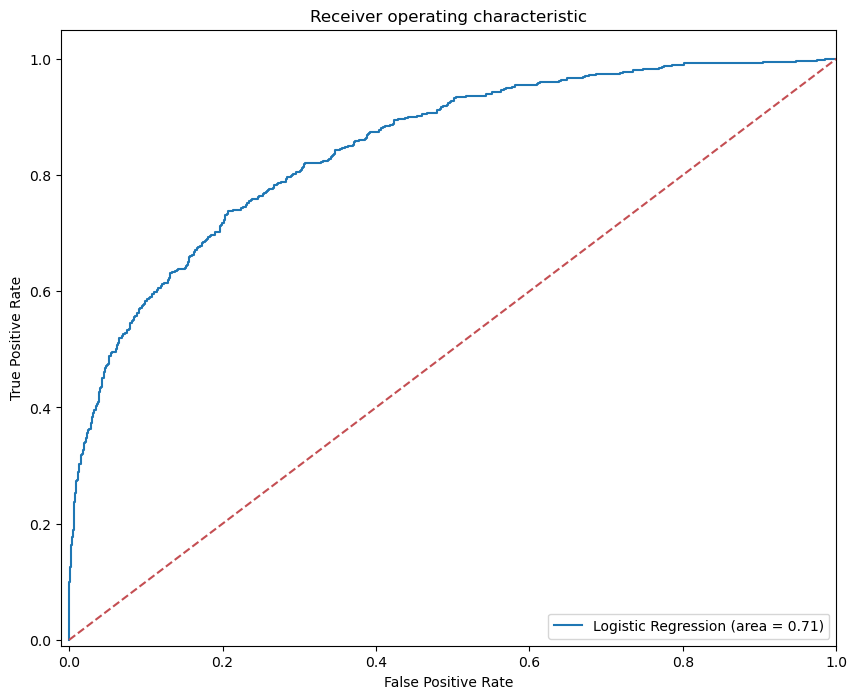

In [126]:
#AUC ROC curve

logit_roc_auc = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test,  model.predict_proba(X_test),pos_label=1)
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


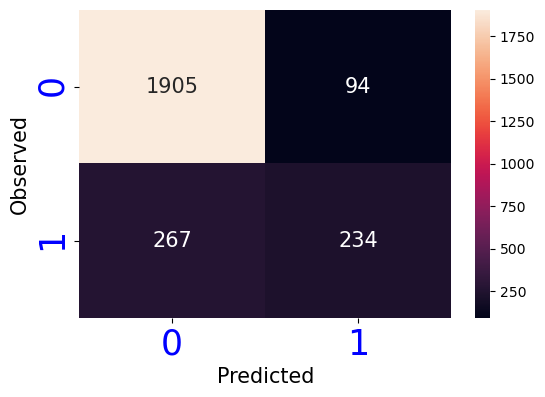

In [127]:
# confusion matrix

cm= confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size":15})
plt.ylabel('Observed', size=15)
plt.xlabel('Predicted', size=15);
plt.xticks(size=25, color='blue');
plt.yticks(size=25, color='blue');